In [1]:
#PRIMERO: Se leen las carpetas de los paises, la hidrografia y las ciudades que estan dentro de la carpeta mapas

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [3]:
#SEGUNDO: Se llama al GeoDataFrame contries para hacer uso de la libreria pandas

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [5]:
#TERCERO: Se elige un pais, en este caso: Alemania

In [6]:
alemania=countries[countries.COUNTRY=='Germany']

In [7]:
#CUARTO: Se plotea el mapa de Alemania y se configura el estilo de la imagen

In [8]:
    # Antes de plotear el mapa se verifica que posean el mismo sistema de proyeccion CRS

In [9]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
cities=cities.to_crs(countries.crs)
rivers=rivers.to_crs(countries.crs)

In [11]:
    #Ahora si se muestra a Alemania

<Axes: >

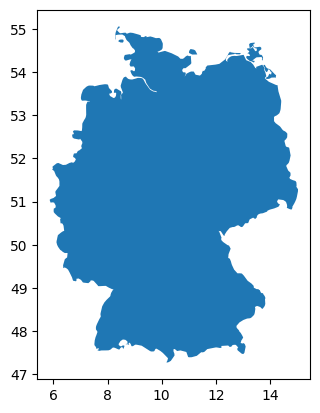

In [12]:
alemania.plot() 

In [13]:
#QUINTO: Se muestra el numero y nombre de las ciudades en Alemania

In [14]:
cities=cities.to_crs(countries.crs)

In [15]:
cities_alemania=cities[cities.COUNTRY=='Germany']
cities_alemania.shape


(12, 4)

In [16]:
cities_alemania.head()

,NAME,COUNTRY,CAPITAL,geometry
18,Hamburg,Germany,N,POINT (10.02761 53.57112)
23,Bremen,Germany,N,POINT (8.85763 53.08010)
24,Berlin,Germany,Y,POINT (13.32757 52.51627)
31,Dortmund,Germany,N,POINT (7.46642 51.51381)
32,Duisburg,Germany,N,POINT (6.77530 51.48934)


In [17]:
#SEXTO: Se plotean las ciudades de Alemania

<Axes: >

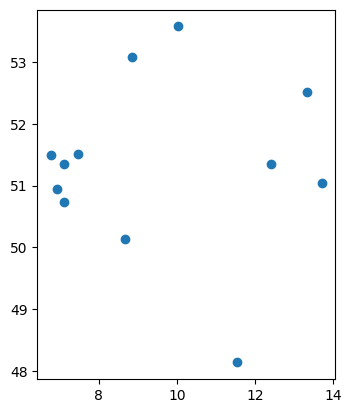

In [18]:
cities_alemania=cities[cities.COUNTRY=='Germany']
cities_alemania.plot()

In [19]:
#SETIMO: Se muestra el numero y nombres de los rios de Alemania

In [20]:
rivers_alemania = gpd.clip(gdf=rivers,mask=alemania)
rivers_alemania.shape

(2, 3)

In [21]:
rivers_alemania.head()

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((8.73734 47.99981, 9.56016 48..."
61,Rhine,None,"MULTILINESTRING ((6.42693 51.85182, 6.88766 51..."


In [22]:
#OCTAVO: Se plotean los rios de Alemania

<Axes: >

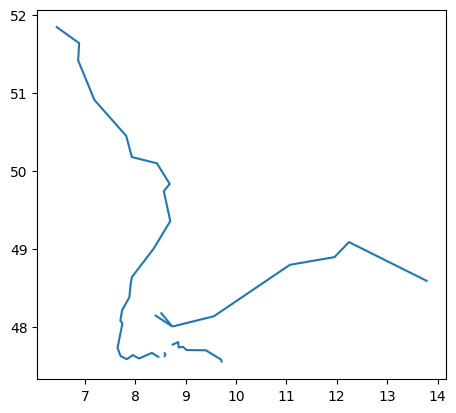

In [23]:
rivers_alemania = gpd.clip(gdf=rivers,mask=alemania)
rivers_alemania.plot()

In [24]:
#NOVENO: Se plotean las 3 capas anteriores en una sola figura

<Axes: >

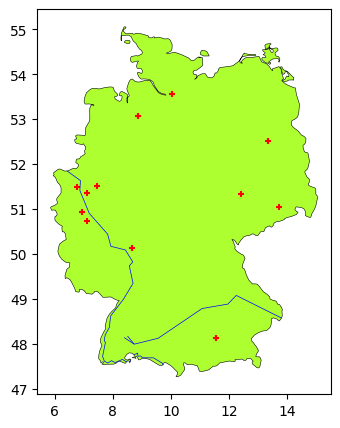

In [25]:
base = alemania.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_alemania.plot(marker='+', color='red', markersize=15,ax=base)
rivers_alemania.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [26]:
#DECIMO: Se localiza el pais en el mapa mundia a traves de las cordenadas

In [27]:
    # Se establecen las cordenadas obtenidas del web: https://www.geodatos.net/en/coordinates:

In [28]:
alemaniaCoord=[51.165691, 10.451526]

In [29]:
m = cities_alemania.explore(location=alemaniaCoord,
                   zoom_start=5,#zoom
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_alemania.explore(m=m, color="blue",
                   name="rivers")
m

In [30]:
    # Ahora veamos el mismo mapa de manera interactiva utilizando capas

In [31]:
import folium
m = cities_alemania.explore(location=alemaniaCoord,
                   zoom_start=5,#zoom
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_alemania.explore(m=m, color="blue",
                   name="rivers")
folium.LayerControl().add_to(m)
m

In [32]:
#ONCEAVO: Se reproyecta el CRS para obtener cordenadas, se usa este link: https://epsg.io/?q=Germany

In [33]:
alemania.to_crs(4839).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [34]:
alemania.to_crs(4839).centroid

87    POINT (-8846.157 5657.148)
dtype: geometry

In [35]:
    # Se plotea con la nueva proyeccion y se obtiene el centroide en el mapa

<Axes: >

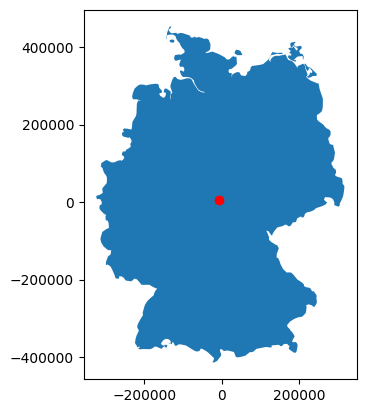

In [36]:
base4839=alemania.to_crs(4839).plot()
alemania.to_crs(4839).centroid.plot(color='red',ax=base4839)

In [37]:
    # Se reproyectan las ciudades y rios a fin de que todo este en el mismo CRS

In [38]:
alemania_4839=alemania.to_crs(4839)

cities_alemania=cities[cities.COUNTRY=='Germany']
cities_4839=cities_alemania.to_crs(alemania_4839.crs)

rivers_4839=rivers.to_crs(alemania_4839.crs)
rivers_4839=gpd.clip(gdf=rivers_4839,mask=alemania_4839)

In [39]:
    # Se plotea el mapa reproyectado: primero Alemania

<Axes: >

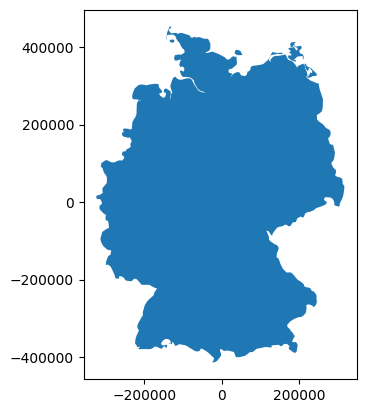

In [40]:
alemania_4839.plot()

In [41]:
    # Se plotea el mapa reproyectado: segundo las ciudades de Alemania

<Axes: >

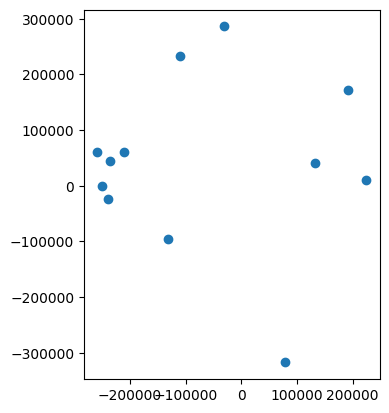

In [42]:
cities_4839.plot()

In [43]:
    # Se plotea el mapa reproyectado: tercero los rios de Alemania

<Axes: >

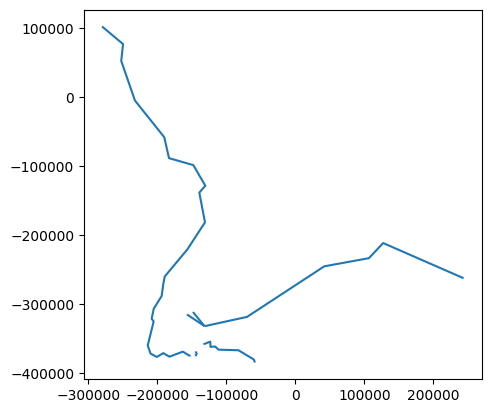

In [44]:
rivers_4839.plot()

In [45]:
    # Se plotea el mapa reproyectado uniendo a Alemania con sus ciudades y rios

<Axes: >

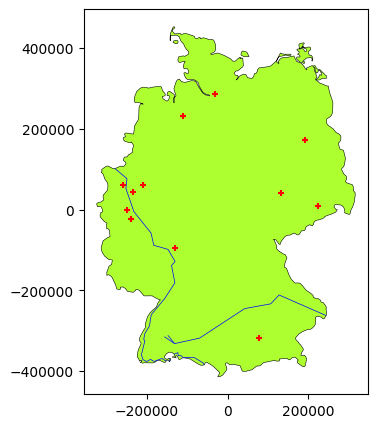

In [46]:
base = alemania_4839.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_4839.plot(marker='+', color='red', markersize=15,ax=base)
rivers_4839.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [47]:
    # Se plotea el mapa reproyectado unificado e interactivo

In [48]:
import folium
m = cities_4839.explore(location=alemaniaCoord,
                   zoom_start=5,#zoom
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") 
m = rivers_4839.explore(m=m, color="blue",
                   name="rivers")
folium.LayerControl().add_to(m)
m

In [49]:
#DOCEAVO: Se exporta el mapa en la carpeta "figures" como imagen

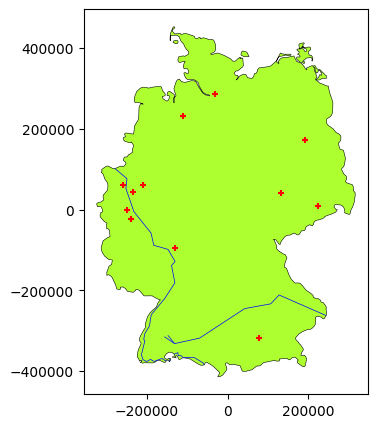

In [50]:
import matplotlib.pyplot as plt

base = alemania_4839.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_4839.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_4839.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapGermany.jpg'))

In [ ]:
#TRECEAVO: Se guardan los 3 mapas reproyectados en un archivo de geopaquete

In [52]:
import os

alemania_4839.to_file(os.path.join("maps","alemania_4839","alemaniaMaps_4839.gpkg"), layer='countries', driver="GPKG")
cities_4839.to_file(os.path.join("maps","alemania_4839","alemaniaMaps_4839.gpkg"), layer='cities', driver="GPKG")
rivers_4839.to_file(os.path.join("maps","alemania_4839","alemaniaMaps_4839.gpkg"), layer='rivers', driver="GPKG")

In [54]:
#Link de GitHub

In [55]:
alemaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation2-DelaCruz/raw/main/maps/alemania_4839/alemaniaMaps_4839.gpkg'

In [56]:
from  fiona import listlayers 

listlayers(alemaniaMaps)

['countries', 'cities', 'rivers']

In [57]:
countries=gpd.read_file(alemaniaMaps,layer='countries')
cities=gpd.read_file(alemaniaMaps,layer='cities')
rivers=gpd.read_file(alemaniaMaps,layer='rivers')

<Axes: >

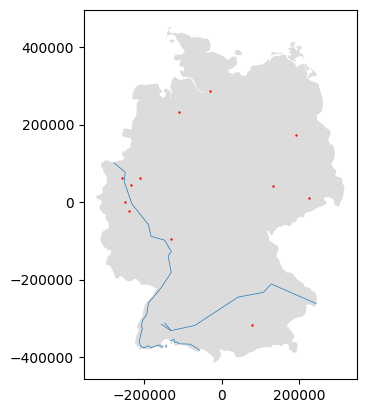

In [58]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)